In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# PREPARAÇÃO DOS DADOS

# Datapoints (NOTAS)
x_numpy = np.array([2,4,3,5,7,2,9,4,10,9,4,6,1,5,6,9,8,3, 1, 5, 6, 5,2, 7, 8, 2,5,9, 10,2,1,3,8,5,6,5])
# 3 classes (0=reprovados, 1=recuperação, 2=aprovados) 
y_numpy = np.array([0,0,0,1,2,0,2,0,2,2,0,1,0,1,1,2,1,0,0,1,1,1,0,2,2,0,1,2,2,0,0,0,2,1,1,1])

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.long()
x = x.view(x.shape[0], 1)

print(x.shape)
print(y.shape)
print(y)

torch.Size([36, 1])
torch.Size([36])
tensor([0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 2,
        2, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1, 1])


GRÁFICO DA FUNÇÃO DE CUSTO


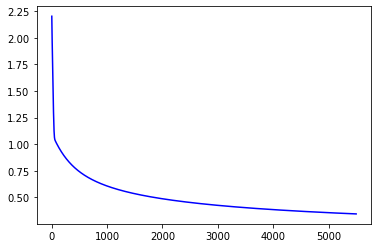

In [11]:
# CLASS DE REGRESSÃO LOGÍSTICA

class RegressaoSoftmax(nn.Module):
  def __init__(self, n_input, n_output):
    super(RegressaoSoftmax, self).__init__()
    self.Linear = nn.Linear(n_input, n_output)

  def forward(self, x):
    return self.Linear(x)


# DEFINICIÇÃO DE MODELO
input_size = 1
output_size = 3
model = RegressaoSoftmax(input_size, output_size)

# DEFINIÇÃO DA FUNÇAO DE CUSTO E OTIMIZADOR
learning_rate = 0.02
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# LOOP DE TREINAMENTO
num_epochs = 5500
contador_custo = []
for epoch in range(num_epochs):
  #forward pass and loos
  y_hat = model(x)  
  loss = criterion(y_hat, y)
  contador_custo.append(loss)
  #print(y_hat)

  #backward pass (calcular gradientes)
  loss.backward()

  #update (atualizar os pesos)
  optimizer.step()

     
  #limpar o otimizador
  optimizer.zero_grad()



# PLOTANDO O GRÁFICO DA FUNÇÃO DE CUSTO
print("GRÁFICO DA FUNÇÃO DE CUSTO")
plt.plot(contador_custo, 'b')
plt.show()

In [12]:
# fazer predição de teste
teste = np.array([4, 9, 7, 2, 6, 5, 4.9, 4.5])
t_teste = torch.from_numpy(teste.astype(np.float32))
t_teste = t_teste.view(t_teste.shape[0], 1)

with torch.no_grad():
  predicoes = model(t_teste)
  print (np.argmax(predicoes, axis=1).flatten())

tensor([0, 2, 2, 0, 1, 1, 1, 1])
